In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
import negf_NN_coulomb as negf_method
import selfconsistent_trapz as st
import Scattering_Region as helical_chain

import currents as currents
import handyfunctions as hf

### Hamiltonian of scattering region

## Scattering Region , Leads


In [3]:
Phi0_meter = 4.136*(10**-15) ### 1 Weber = 1 T*(m**2)
Phi0_angstrom = 4.136*(10**5) ##T*(Angstrom**2)

In [4]:
T = 300
betaL,betaR = negf_method.func_beta(T),negf_method.func_beta(T)

N = 4                   ## number of sites in one winding
M = 1                   ## number of windings
a = 1.4                 ## radius of helix in Angstrom
c = 3.6                 ## pitch of helix in Angstrom
chirality = False       ## chirality of the helix.
Phi0 = Phi0_angstrom  ## magnetic flux quantum e/h

Bvec = np.array([1,0,0]) ##Tesla
tvec = [0,0,1]           ##symmetry axis


t = 2.4                  ## nearest-neigbour hopping paramter eV
tprime = 0.4*t           ## next-nearest-neigbour hopping paramter eV


gammaL,gammaR = 0.5,0.5 ## coupling-strength to left,right lead eV
pz = 0

T       = 300                    ## temperature T in Kelvin.
## beta of left,right lead
betaL,betaR = negf_method.func_beta(T),negf_method.func_beta(T)

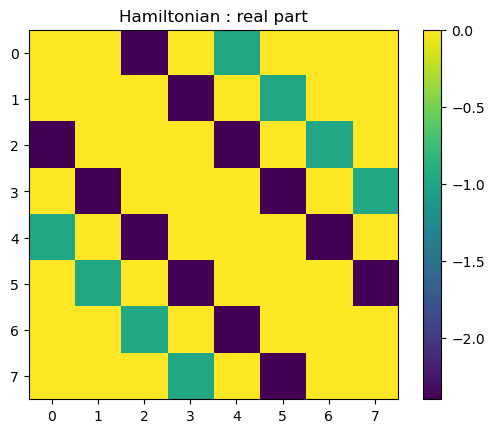

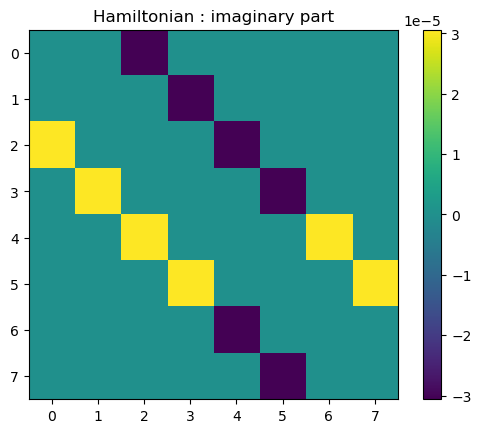

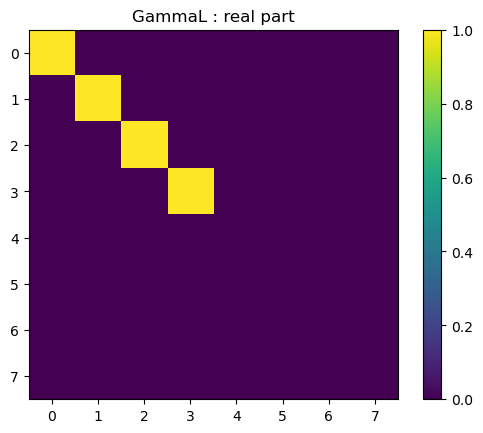

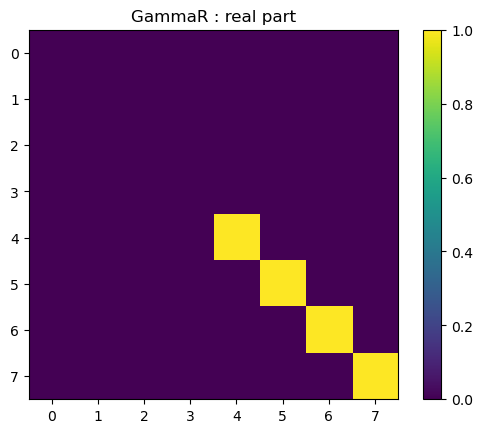

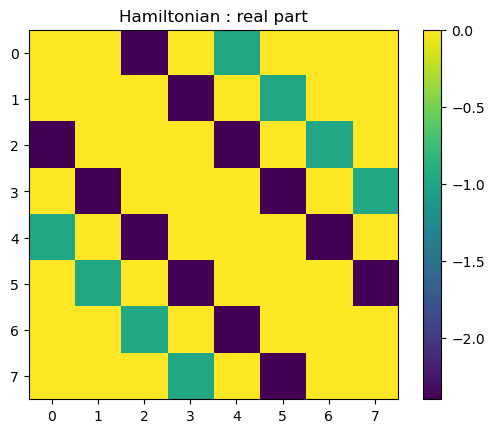

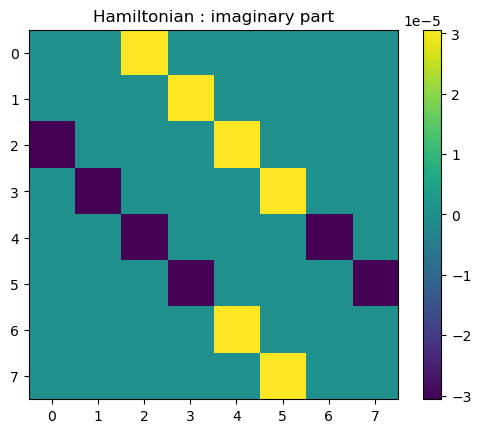

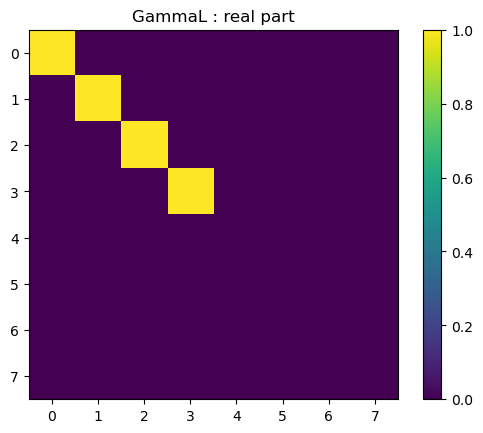

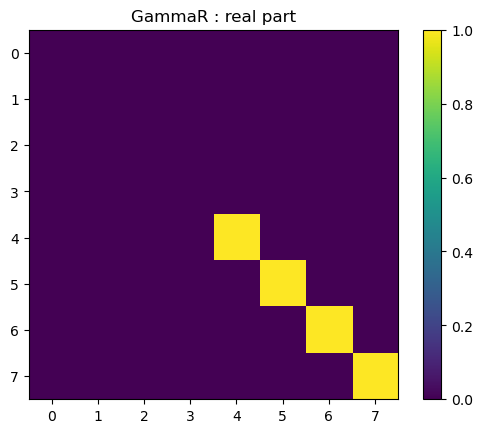

In [5]:
H0P,GammaLP,GammaR = helical_chain.system(t,tprime,
                                           Bvec,tvec,Phi0,
                                           a,c,M,N,chirality,
                                                   gammaR,gammaL,pz,
                                          plot_bool=True
                                          )


H0M,GammaLM,GammaR = helical_chain.system(t,tprime,
                                           -Bvec,tvec,Phi0,
                                           a,c,M,N,chirality,
                                                   gammaR,gammaL,pz,
                                          plot_bool=True
                                          )


dim = H0P.shape[0]


# Loop for negative and positive bias

In [6]:
ef      = 0                      ## Fermi level
U       =  0.5*t                 ## onsite Coulomb interaction strength
W       = 0.5*t                  ## nearest neigbour Coulomb interaction strength



T       = 300                    ## temperature T in Kelvin.
betaL = negf_method.func_beta(T) ## beta of left lead
betaR = betaL   

Vmax = 2

#### Energy window to integrate Glesser function over.
n00_V0_guess   = n00_V0_guess = 0.5*np.ones((dim,)) ## initial guess for V=0,first iteration.
tol_nintegrand = 10**-6  ##tolerance on integrand of electron densities
npoints      = 6000
npoints_tail = 4000
emin2,emin,emax,energies = hf.func_energies(ef,
                      H0P,U,W,dim,
                 GammaLP,GammaR,
                betaL,betaR,
                   npoints,npoints_tail,
                   T,Vmax,tol_nintegrand)

print(emin2,emin)

#######
alpha          = 0.2     ##mixing parameter
tol            = 10**-4  ##tolerance on electron densities
max_iteration  = 200      ##maximum number of iterations.

Estimating lower bound...
-404.7 -14.7


In [7]:
V_pos_bias,Varray_total = st.func_Vbias(Vmax=Vmax,Vnpoints= 3)

[-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ] 7


--- V = 0 ---
[0.0234 0.0234 0.0735 0.0735 0.0765 0.0765 0.0272 0.0272]
[0.0118 0.0118 0.0084 0.0084 0.0085 0.0085 0.0135 0.0135]
[0.0028 0.0028 0.0018 0.0018 0.002  0.002  0.0031 0.0031]
[0.0006 0.0006 0.0004 0.0004 0.0005 0.0005 0.0008 0.0008]
[0.0001 0.0001 0.     0.     0.0001 0.0001 0.0002 0.0002]
[0. 0. 0. 0. 0. 0. 0. 0.]


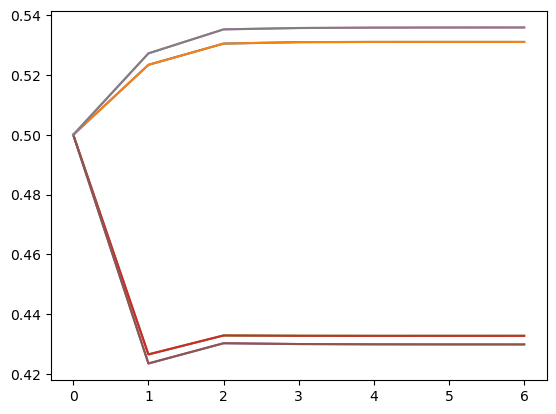

--- V = 0.6666666666666666 ---
[0.0159 0.0159 0.0024 0.0024 0.0105 0.0105 0.0159 0.0159]
[0.004  0.004  0.0038 0.0038 0.0011 0.0011 0.0008 0.0008]
[0.0018 0.0018 0.0015 0.0015 0.001  0.001  0.0008 0.0008]
[0.0008 0.0008 0.0007 0.0007 0.0006 0.0006 0.0005 0.0005]
[0.0004 0.0004 0.0004 0.0004 0.0003 0.0003 0.0003 0.0003]
[0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002]
[0.0001 0.0001 0.     0.     0.     0.     0.     0.    ]
[0. 0. 0. 0. 0. 0. 0. 0.]


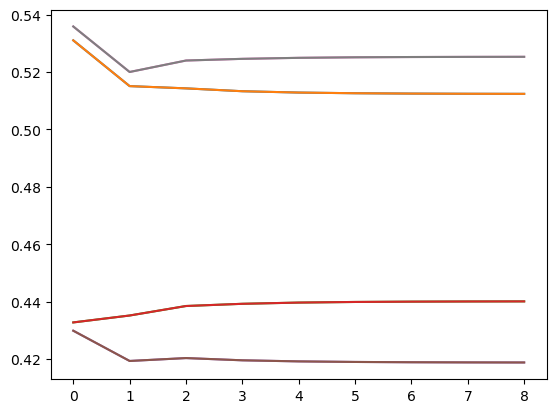

--- V = 1.3333333333333335 ---
[0.04   0.04   0.0027 0.0027 0.0156 0.0156 0.0421 0.0421]
[0.0004 0.0004 0.0071 0.0071 0.0024 0.0024 0.0043 0.0043]
[0.0027 0.0027 0.0011 0.0011 0.0013 0.0013 0.0006 0.0006]
[0.0007 0.0007 0.0008 0.0008 0.0004 0.0004 0.0005 0.0005]
[0.0004 0.0004 0.0003 0.0003 0.0003 0.0003 0.0002 0.0002]
[0.0002 0.0002 0.0002 0.0002 0.0001 0.0001 0.0001 0.0001]
[0. 0. 0. 0. 0. 0. 0. 0.]


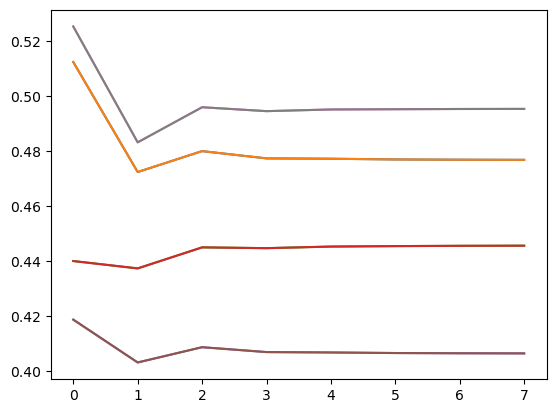

--- V = 2.0 ---
[0.0634 0.0634 0.0107 0.0107 0.0182 0.0182 0.0702 0.0702]
[0.0071 0.0071 0.0118 0.0118 0.0061 0.0061 0.0098 0.0098]
[0.0054 0.0054 0.0005 0.0005 0.002  0.002  0.0037 0.0037]
[0.0003 0.0003 0.0012 0.0012 0.0001 0.0001 0.0011 0.0011]
[0.0005 0.0005 0.0001 0.0001 0.0003 0.0003 0.0001 0.0001]
[0.     0.     0.0002 0.0002 0.     0.     0.0001 0.0001]
[0. 0. 0. 0. 0. 0. 0. 0.]


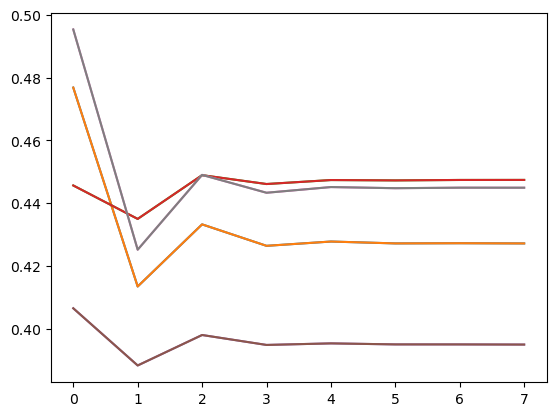

--- V = -0.6666666666666666 ---
[0.0013 0.0013 0.005  0.005  0.0077 0.0077 0.0014 0.0014]
[0.0025 0.0025 0.0026 0.0026 0.0025 0.0025 0.0022 0.0022]
[0.0014 0.0014 0.0013 0.0013 0.0013 0.0013 0.0013 0.0013]
[0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007]
[0.0004 0.0004 0.0004 0.0004 0.0003 0.0003 0.0003 0.0003]
[0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002]
[0.0001 0.0001 0.     0.     0.     0.     0.     0.    ]
[0. 0. 0. 0. 0. 0. 0. 0.]


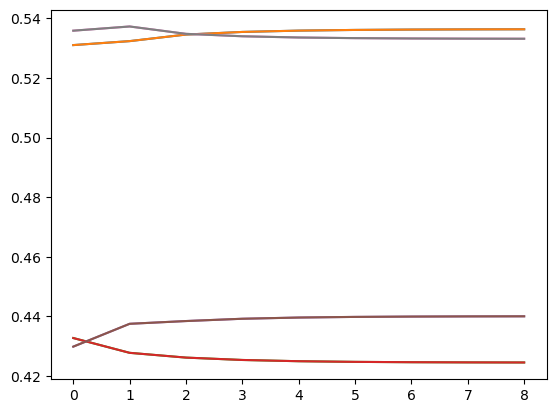

--- V = -1.3333333333333335 ---
[0.0167 0.0167 0.0083 0.0083 0.0045 0.0045 0.0145 0.0145]
[0.0009 0.0009 0.001  0.001  0.0042 0.0042 0.0034 0.0034]
[0.0008 0.0008 0.0011 0.0011 0.0015 0.0015 0.0017 0.0017]
[0.0005 0.0005 0.0006 0.0006 0.0007 0.0007 0.0008 0.0008]
[0.0003 0.0003 0.0003 0.0003 0.0004 0.0004 0.0004 0.0004]
[0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002]
[0. 0. 0. 0. 0. 0. 0. 0.]


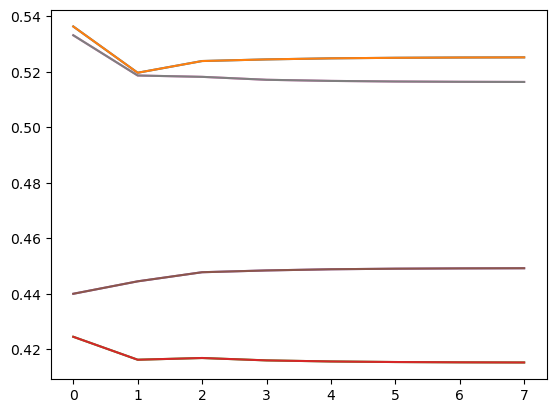

--- V = -2.0 ---
[0.0313 0.0313 0.0091 0.0091 0.0012 0.0012 0.0256 0.0256]
[0.0007 0.0007 0.0005 0.0005 0.0055 0.0055 0.0032 0.0032]
[0.     0.     0.0007 0.0007 0.0014 0.0014 0.0019 0.0019]
[0.0003 0.0003 0.0004 0.0004 0.0007 0.0007 0.0007 0.0007]
[0.0002 0.0002 0.0002 0.0002 0.0003 0.0003 0.0003 0.0003]
[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]
[0. 0. 0. 0. 0. 0. 0. 0.]


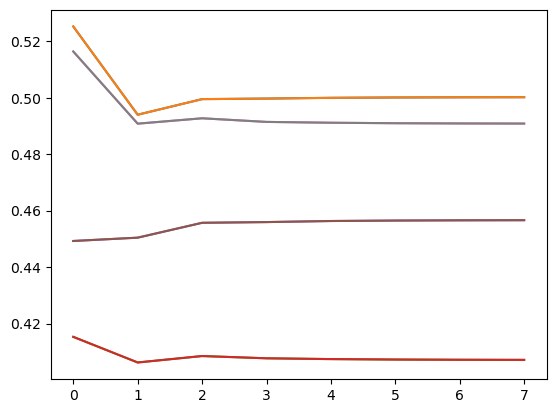

In [8]:
nP_total,convgP = st.self_consistent_trapz_PN(ef,V_pos_bias,n00_V0_guess,
                                  max_iteration,energies,
                                    tol,tol_nintegrand,
                                    alpha,
                                negf_method.ndensity_listi,
                                      H0P,U,W,dim,
                                 GammaLP,GammaR,
                                betaL,betaR,
                             plotbool=True,printbool=True)




In [9]:
nM_total,convgM = st.self_consistent_trapz_PN(ef,V_pos_bias,n00_V0_guess,
                                  max_iteration,energies,
                                    tol,tol_nintegrand,
                                    alpha,
                                negf_method.ndensity_listi,
                                      H0M,U,W,dim,
                                 GammaLM,GammaR,
                                betaL,betaR,
                             plotbool=False,printbool=False)

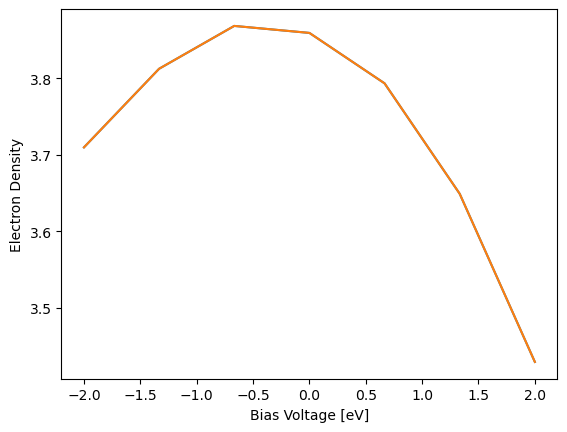

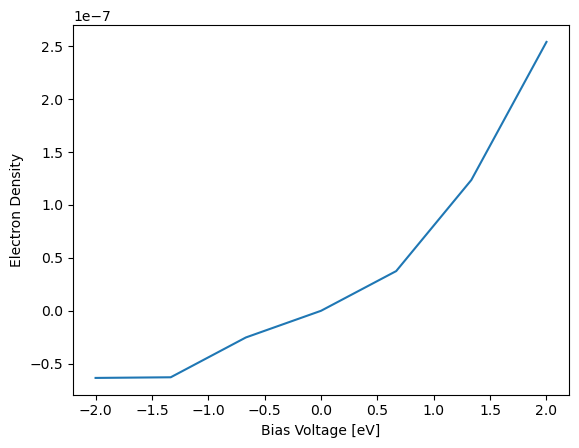

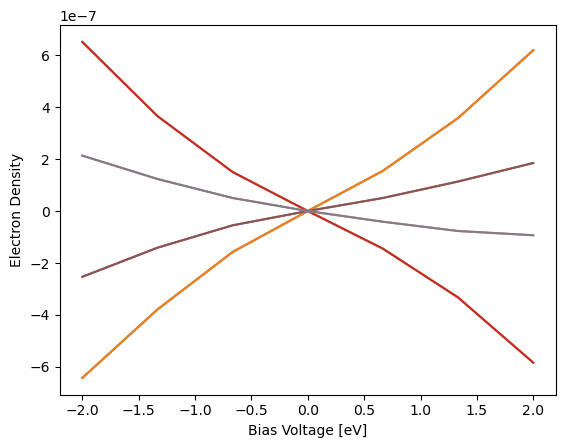

In [10]:
plt.plot(Varray_total,nP_total.sum(axis=1) ,label = 'n(m)')
plt.plot(Varray_total,nM_total.sum(axis=1),label = 'n(-m)')

plt.xlabel('Bias Voltage [eV]')
plt.ylabel('Electron Density')
plt.show()


plt.plot(Varray_total,nP_total.sum(axis=1) - nM_total.sum(axis=1),label = 'n(m)-n(-m)')

plt.xlabel('Bias Voltage [eV]')
plt.ylabel('Electron Density')
plt.show()
plt.plot(Varray_total,nP_total-nM_total)

plt.xlabel('Bias Voltage [eV]')
plt.ylabel('Electron Density')
plt.show()

# Onsager reciprocity check

Check that at V=0 transmission for opposite magnetizations vanish

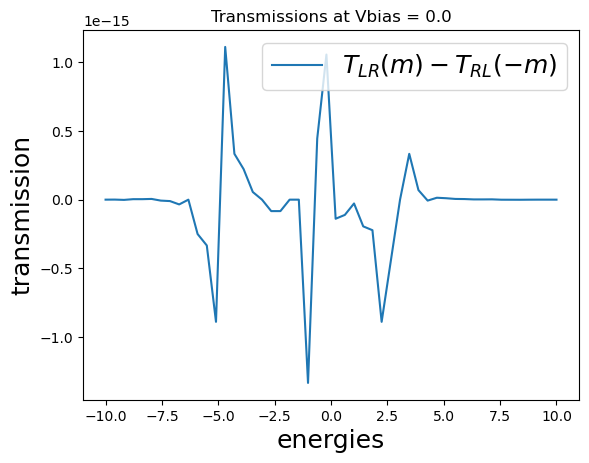

True

In [11]:
V_convg,nP_total_convg,nM_total_convg = hf.func_converged_and_biassymmetric(
                                                Varray_total,nP_total,convgP, 
                                                nM_total,convgM)

hf.check_onsager(10**-13, 
                    H0P,H0M,
                      U,W,
                      nM_total_convg,nP_total_convg,V_convg,
                      dim,
                    GammaLP,GammaLM,
                    GammaR)

# Currents

In [12]:
npoints_integrate = 3000 ## number of points to integrate over
nround            = 12 ## round the integrand of the current to this this decimal

In [13]:
IP_array = currents.current_voltage(V_convg,nP_total_convg,ef,
                      npoints_integrate,nround,
                     negf_method.integrand_current,
                                      H0P,U,W,dim,
                                 GammaLP,GammaR,
                                betaL,betaR,eta=1/2,plot_bool=False)

IM_array = currents.current_voltage(V_convg,nM_total_convg,ef,
                      npoints_integrate,nround,
                     negf_method.integrand_current,
                                      H0M,U,W,dim,
                                 GammaLM,GammaR,
                                betaL,betaR,eta=1/2,plot_bool=False)

In [14]:
deltaI = IP_array-IM_array
Vprime,PC_array = currents.func_PC_list(IP_array,IM_array,V_convg)

check that Onsager reciprocity holds


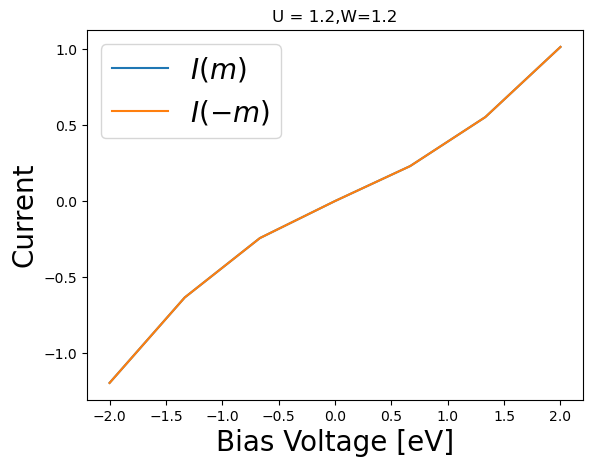

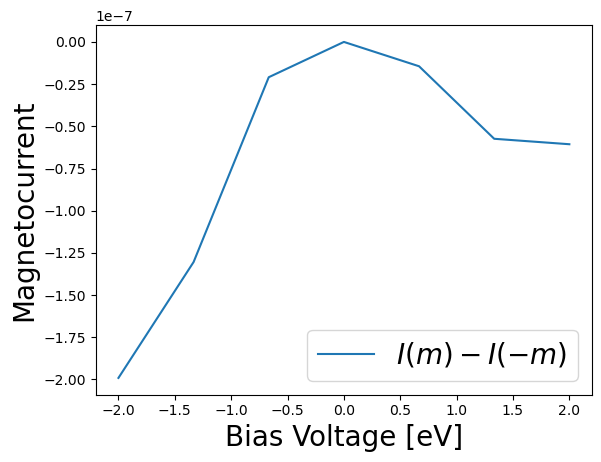

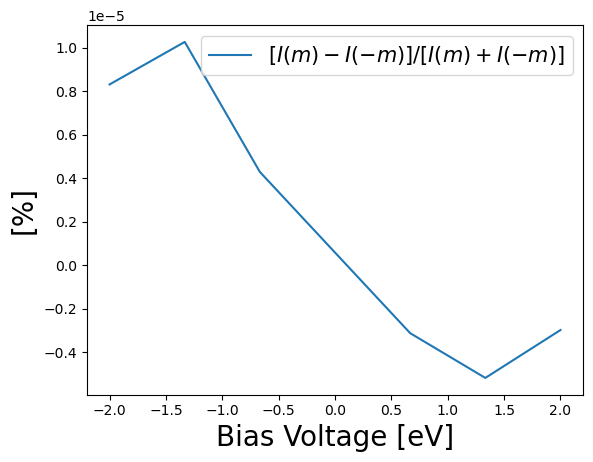

In [15]:
size = 20
plt.title('U = {},W={}'.format(U,W))
plt.plot(V_convg,IP_array,label = '$I(m)$')
plt.plot(V_convg,IM_array,label = '$I(-m)$')
plt.xlabel('Bias Voltage [eV]',size=size)
plt.ylabel('Current',size=size)
plt.legend(fontsize = size)
plt.show()

plt.plot(V_convg,deltaI,label = '$I(m) - I(-m)$')
plt.xlabel('Bias Voltage [eV]',size=size)
plt.ylabel('Magnetocurrent',size=size)
plt.legend(fontsize = size)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
plt.show()

plt.plot(Vprime,PC_array,label = '$[I(m) - I(-m)]/[I(m) + I(-m)]$')
plt.xlabel('Bias Voltage [eV]',size=size)
plt.ylabel('[%]',size=size)
plt.legend(fontsize = size-5)
plt.ticklabel_format(style="sci", scilimits=(0,0),axis = 'y')
plt.show()